# EDA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
data=pd.read_csv('credit_risk_dataset.csv')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [6]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [4]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [12]:
# Get numeric columns
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()
len(numeric_columns)

8

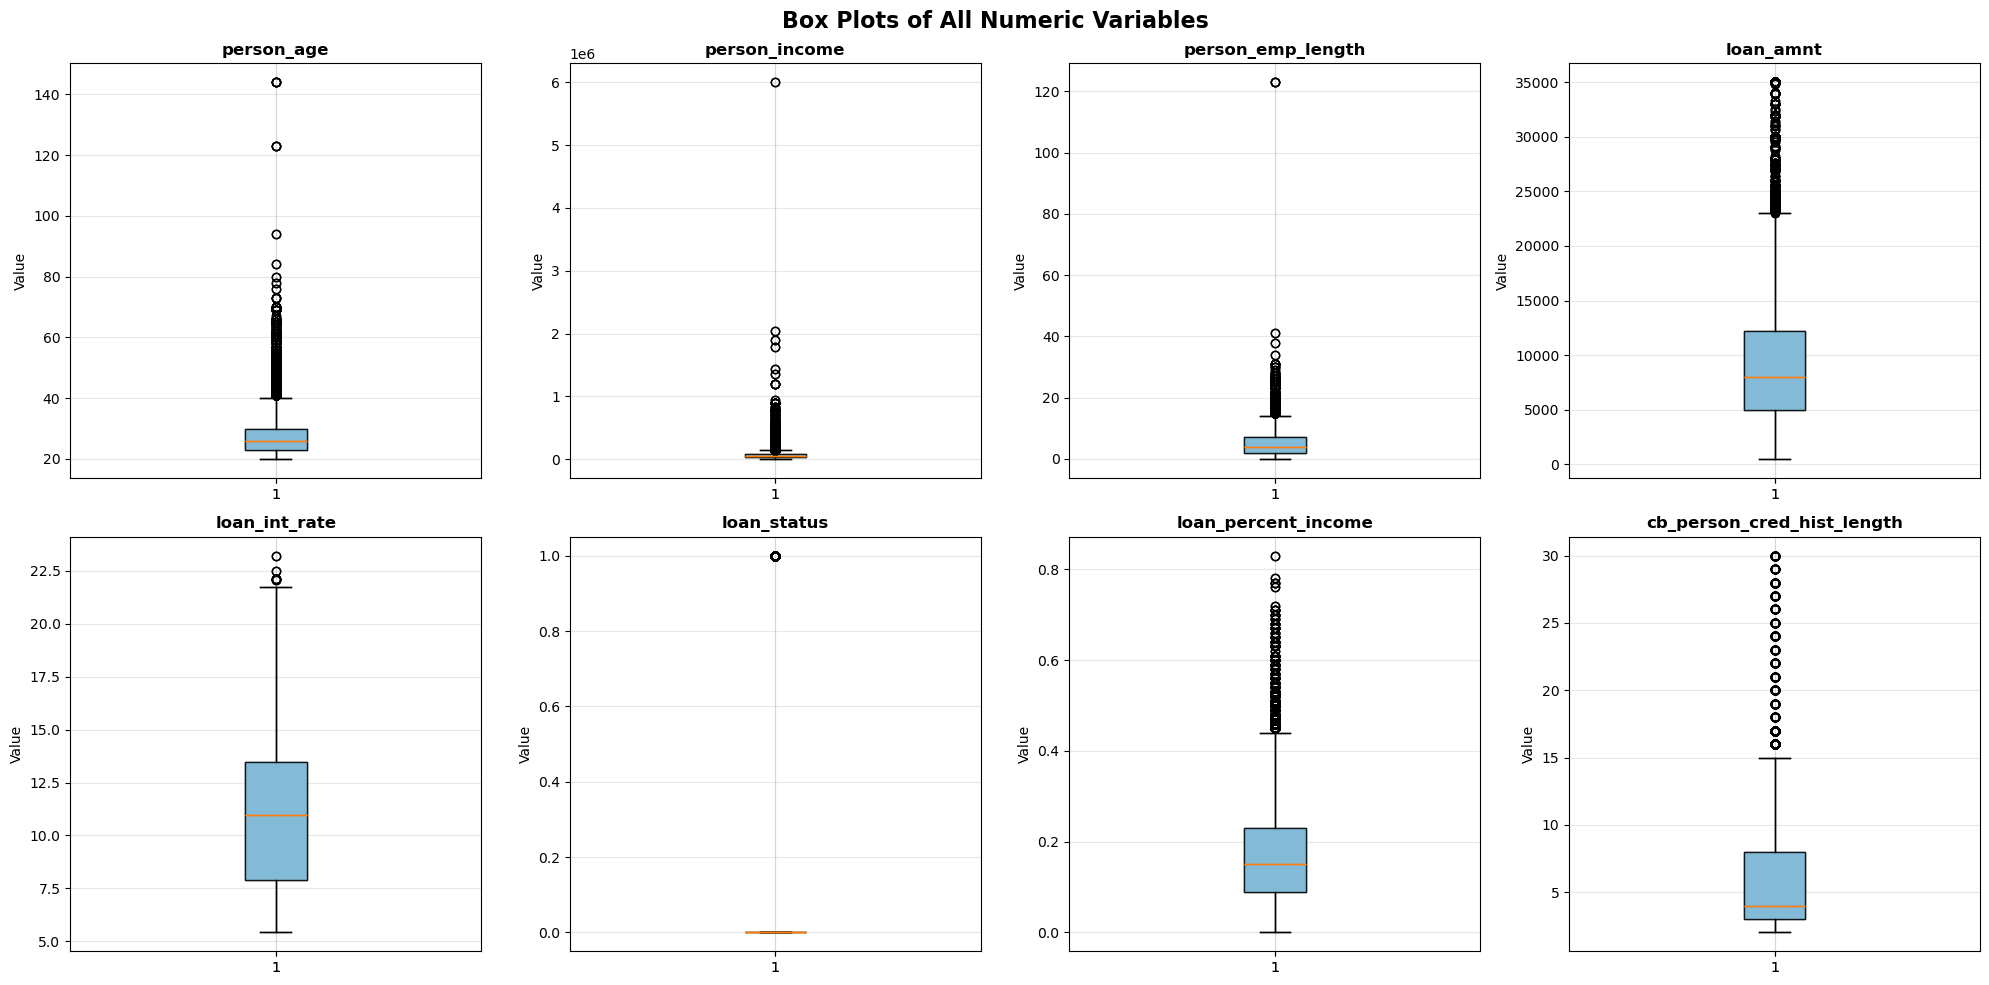

In [13]:
# Create box plots for all numeric variables
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
fig.suptitle('Box Plots of All Numeric Variables', fontsize=16, fontweight='bold')
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    if i < len(axes):
        axes[i].boxplot(data[col].dropna(), patch_artist=True)
        axes[i].set_title(col, fontweight='bold')
        axes[i].set_ylabel('Value')
        axes[i].grid(True, alpha=0.3)
        
        # Add some styling
        bp = axes[i].boxplot(data[col].dropna(), patch_artist=True)
        for patch in bp['boxes']:
            patch.set_facecolor('lightblue')
            patch.set_alpha(0.7)

# Hide any unused subplots
for i in range(len(numeric_columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()


In [14]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [19]:
# Get categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
len(categorical_columns)

4

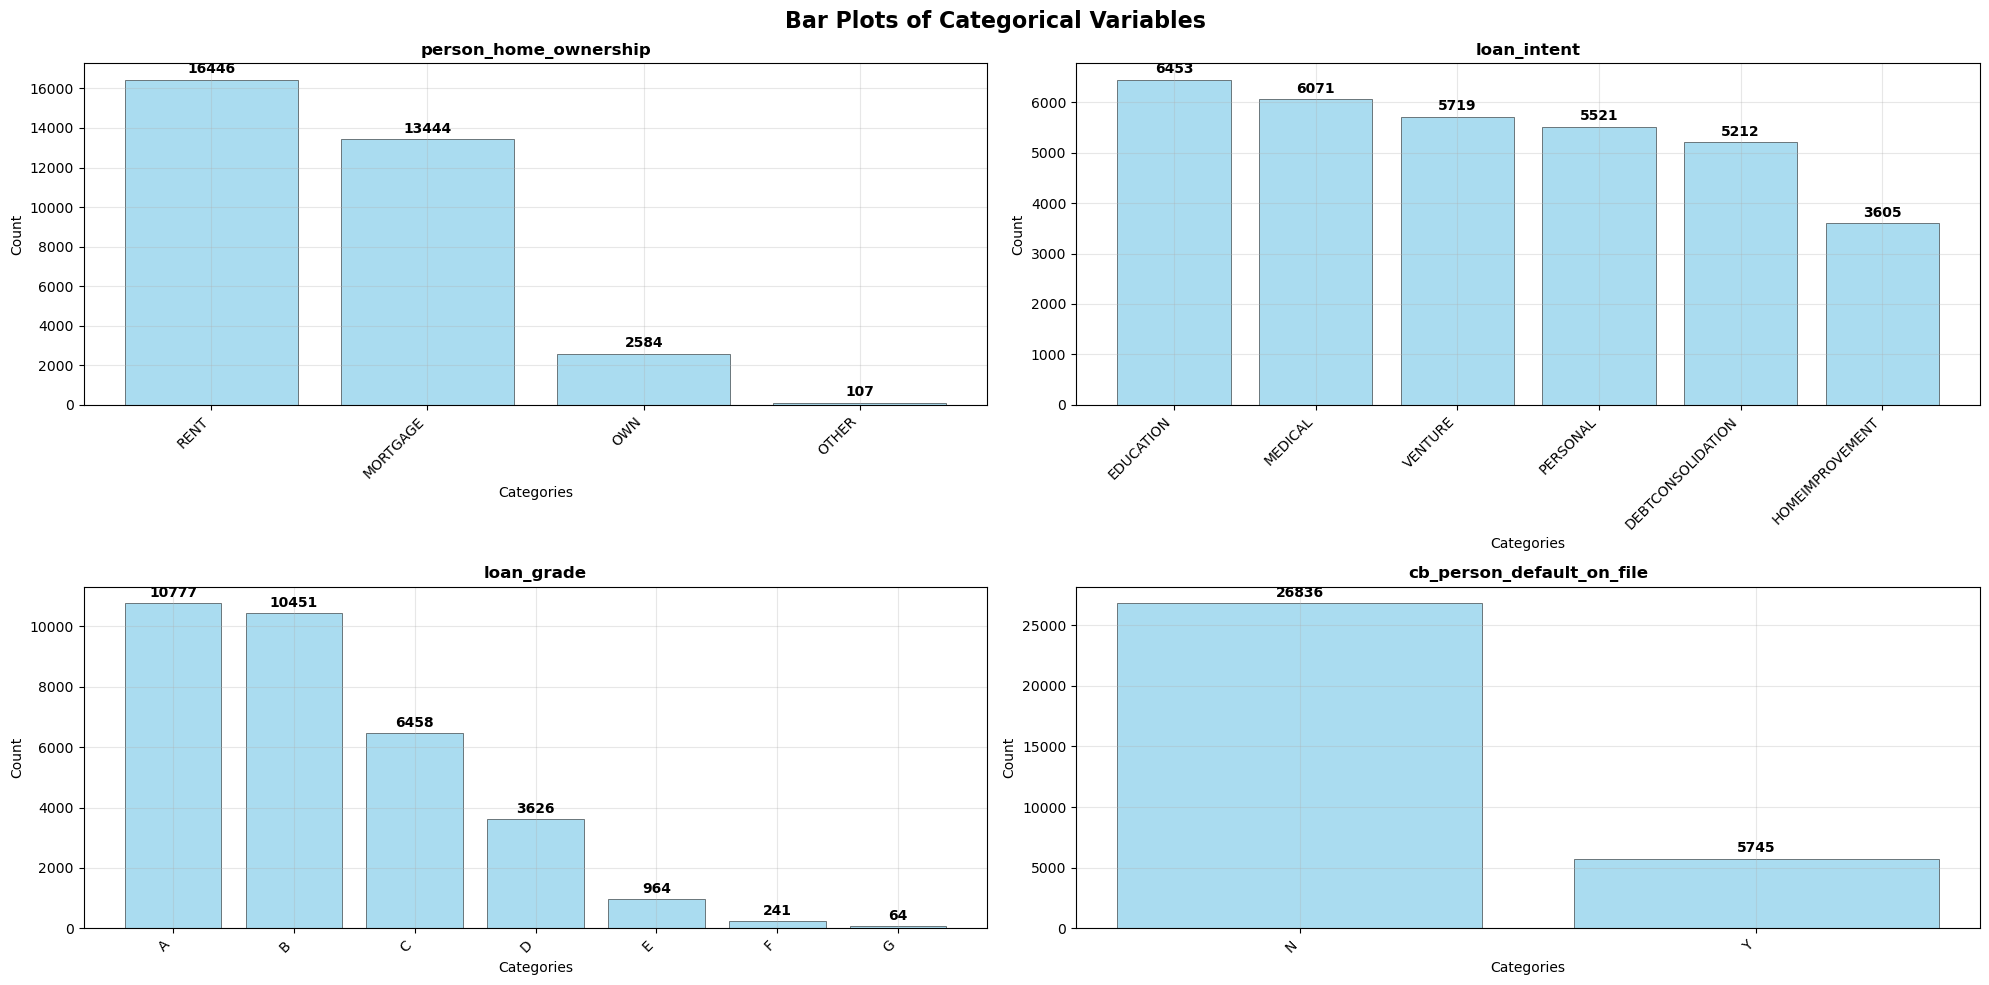

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
fig.suptitle('Bar Plots of Categorical Variables', fontsize=16, fontweight='bold')
axes = axes.flatten()
    
for i, col in enumerate(categorical_columns):
        if i < len(axes):
            # Count values and plot
            value_counts = data[col].value_counts()
            axes[i].bar(range(len(value_counts)), value_counts.values, 
                       color='skyblue', alpha=0.7, edgecolor='black', linewidth=0.5)
            axes[i].set_title(f'{col}', fontweight='bold', fontsize=12)
            axes[i].set_xlabel('Categories')
            axes[i].set_ylabel('Count')
            axes[i].grid(True, alpha=0.3)
            
            # Set x-axis labels
            axes[i].set_xticks(range(len(value_counts)))
            axes[i].set_xticklabels(value_counts.index, rotation=45, ha='right')
            
            # Add value labels on bars
            for j, v in enumerate(value_counts.values):
                axes[i].text(j, v + max(value_counts.values)*0.01, str(v), 
                           ha='center', va='bottom', fontweight='bold')
    
    # Hide unused subplots
for i in range(len(categorical_columns), len(axes)):
        axes[i].set_visible(False)
    
plt.tight_layout()
plt.show()

Note: loan grades ordinal data

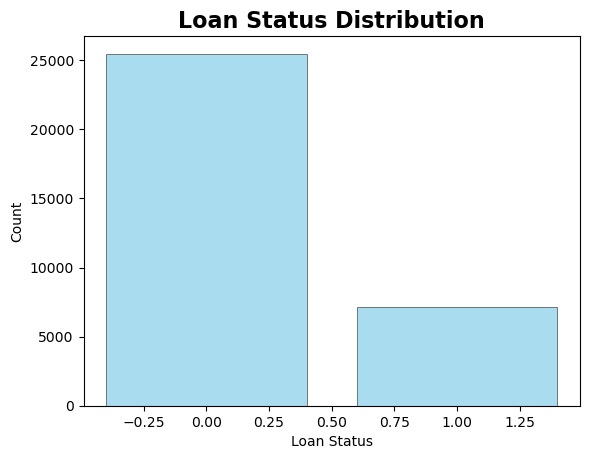

In [37]:
counts = data['loan_status'].value_counts()
plt.bar(counts.index, counts.values, color='skyblue', alpha=0.7, edgecolor='black', linewidth=0.5)
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Loan Status Distribution', fontsize=16, fontweight='bold')
plt.show()


In [41]:
print(pd.crosstab(data['person_home_ownership'], [data['loan_status'], data['loan_grade']]))

loan_status               0                                 1             \
loan_grade                A     B     C    D    E   F  G    A     B    C   
person_home_ownership                                                      
MORTGAGE               5219  3729  1934  658  178  36  0  239   324  321   
OTHER                    23    29    11    9    2   0  0    3     5    6   
OWN                     860   770   464  264   26   7  0   66    34   31   
RENT                   3602  4222  2710  554  137  28  1  765  1338  981   

loan_status                               
loan_grade                D    E   F   G  
person_home_ownership                     
MORTGAGE                553  161  61  31  
OTHER                    11    6   2   0  
OWN                      18   31   8   5  
RENT                   1559  423  99  27  


In [42]:
print(pd.crosstab(data['cb_person_default_on_file'], [data['loan_status'], data['loan_grade']]))

loan_status                   0                                  1             \
loan_grade                    A     B     C    D    E   F  G     A     B    C   
cb_person_default_on_file                                                       
N                          9704  8750  2504  736  169  37  0  1073  1701  698   
Y                             0     0  2615  749  174  34  1     0     0  641   

loan_status                                   
loan_grade                    D    E   F   G  
cb_person_default_on_file                     
N                          1014  330  92  28  
Y                          1127  291  78  35  
